In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from datetime import datetime
import hashlib
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [147]:
pd.set_option('display.max_columns', None)

In [148]:
df = pd.read_csv("Thyroid_Diff.csv")
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [149]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [150]:
df.nunique()

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

In [151]:


import pandas as pd

# Select categorical features
categorical_features = df.select_dtypes(include='object').columns

# Loop through categorical features to show crosstabs with 'Recurred'
for feature in categorical_features:
    print(f'\nCrosstab between Recurred and {feature}:\n')
    ctab = pd.crosstab(df[feature], df['Recurred'], margins=True)
    print(ctab)

    # Optionally, display the normalized version
    print(f'\nNormalized Crosstab (row-wise proportions) for {feature}:\n')
    ctab_norm = pd.crosstab(df[feature], df['Recurred'], normalize='index')
    print(ctab_norm)



Crosstab between Recurred and Gender:

Recurred   No  Yes  All
Gender                 
F         246   66  312
M          29   42   71
All       275  108  383

Normalized Crosstab (row-wise proportions) for Gender:

Recurred        No       Yes
Gender                      
F         0.788462  0.211538
M         0.408451  0.591549

Crosstab between Recurred and Smoking:

Recurred   No  Yes  All
Smoking                
No        259   75  334
Yes        16   33   49
All       275  108  383

Normalized Crosstab (row-wise proportions) for Smoking:

Recurred        No       Yes
Smoking                     
No        0.775449  0.224551
Yes       0.326531  0.673469

Crosstab between Recurred and Hx Smoking:

Recurred     No  Yes  All
Hx Smoking               
No          261   94  355
Yes          14   14   28
All         275  108  383

Normalized Crosstab (row-wise proportions) for Hx Smoking:

Recurred          No       Yes
Hx Smoking                    
No          0.735211  0.264789
Yes 

In [152]:
categorical_features

Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

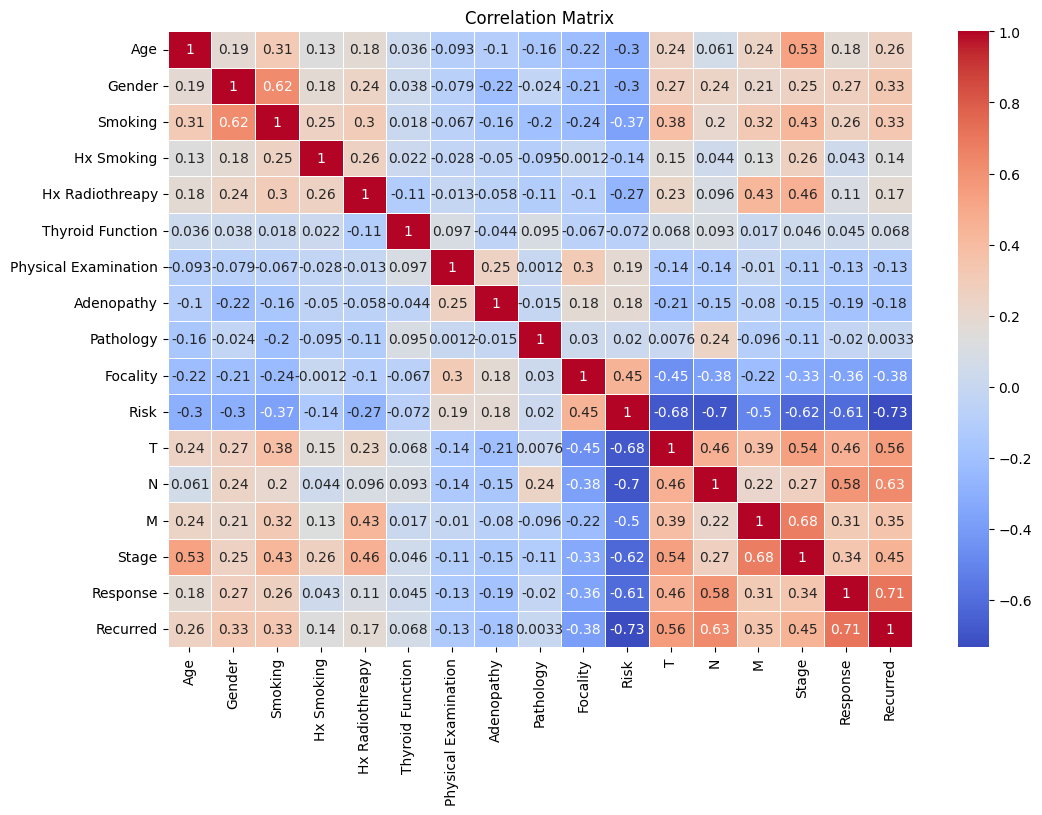

In [153]:
categorical_columns = df.select_dtypes(include='object').columns
df_corr= df.copy()
# Apply Label Encoding to categorical features
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df_corr[col] = label_encoder.fit_transform(df_corr[col])

# Now, the categorical columns have been encoded to numeric values.
# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Visualize it using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [154]:
# Better detection of categorical features
categorical_features = [col for col in df.columns 
                        if df[col].dtype == 'object' or df[col].dtype.name == 'category' 
                        or df[col].nunique() <= 10]

for feature in categorical_features:
    if feature == 'Recurred':
        continue  # Avoid comparing Recurred with itself

    # print(f'\nCrosstab between Recurred and {feature}:\n')
    # ctab = pd.crosstab(df[feature], df['Recurred'], margins=True)
    # print(ctab)

    print(f'\nNormalized Crosstab (row-wise proportions) for {feature}:\n')
    ctab_norm = pd.crosstab(df[feature], df['Recurred'], normalize='index')
    print(ctab_norm)



Normalized Crosstab (row-wise proportions) for Gender:

Recurred        No       Yes
Gender                      
F         0.788462  0.211538
M         0.408451  0.591549

Normalized Crosstab (row-wise proportions) for Smoking:

Recurred        No       Yes
Smoking                     
No        0.775449  0.224551
Yes       0.326531  0.673469

Normalized Crosstab (row-wise proportions) for Hx Smoking:

Recurred          No       Yes
Hx Smoking                    
No          0.735211  0.264789
Yes         0.500000  0.500000

Normalized Crosstab (row-wise proportions) for Hx Radiothreapy:

Recurred               No       Yes
Hx Radiothreapy                    
No               0.728723  0.271277
Yes              0.142857  0.857143

Normalized Crosstab (row-wise proportions) for Thyroid Function:

Recurred                           No       Yes
Thyroid Function                               
Clinical Hyperthyroidism     0.850000  0.150000
Clinical Hypothyroidism      0.833333  0.166667

In [155]:
print(df['Recurred'].value_counts())

Recurred
No     275
Yes    108
Name: count, dtype: int64


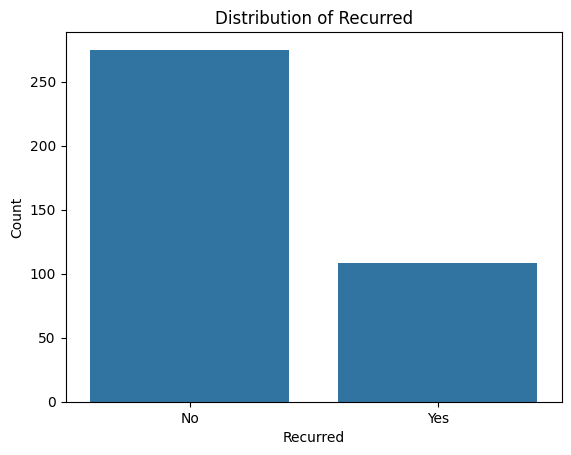

In [156]:

sns.countplot(x='Recurred', data=df)
plt.title('Distribution of Recurred')
plt.xlabel('Recurred')
plt.ylabel('Count')
plt.show()

# Functions

In [157]:
def preprocess_for_ml(df):
    # Encode target variable
    y = df['Recurred']
    if y.dtype == 'object':
        y_encoder = LabelEncoder()
        y = y_encoder.fit_transform(y.astype(str))
    else:
        y = y.values  # already encoded
    
    # Prepare features
    X = df.drop(columns=['Recurred'])
    X = X.replace('*', np.nan)
    X = X.fillna('Missing')

    for col in X.select_dtypes(include='object').columns:
        encoder = LabelEncoder()
        X[col] = encoder.fit_transform(X[col].astype(str))

    return X, y

In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_and_evaluate_classification(model, X_train, X_test, y_train, y_test, label=''):
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1 = f1_score(y_train, y_train_pred, zero_division=0)

    # Testing metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=0)

    # Display results
    print(f"\nModel ({label}) Evaluation:")
    print(f"🔹 Training Set:")
    # print(f"   - Accuracy : {train_accuracy:.2f}")
    # print(f"   - Precision: {train_precision:.2f}")
    # print(f"   - Recall   : {train_recall:.2f}")
    print(f"   - F1 Score : {train_f1:.2f}")
    
    print(f"🔹 Test Set:")
    # print(f"   - Accuracy : {test_accuracy:.2f}")
    # print(f"   - Precision: {test_precision:.2f}")
    # print(f"   - Recall   : {test_recall:.2f}")
    print(f"   - F1 Score : {test_f1:.2f}")

    return {
        'model': label,
        'train': {
            # 'accuracy': train_accuracy,
            # 'precision': train_precision,
            # 'recall': train_recall,
            'f1': train_f1
        },
        'test': {
            # 'accuracy': test_accuracy,
            # 'precision': test_precision,
            # 'recall': test_recall,
            'f1': test_f1
        }
    }


In [159]:
    # # Create the comparison DataFrame
    # comparison = pd.DataFrame({
    #     'Actual Salary': y_test,
    #     'Predicted Salary': y_pred
    # })

    # comparison_sample = comparison

    # # Plot
    # plt.figure(figsize=(8, 5))
    # plt.plot(comparison_sample.index, comparison_sample['Actual Salary'], label='Actual Salary', marker='o')
    # plt.plot(comparison_sample.index, comparison_sample['Predicted Salary'], label='Predicted Salary', marker='x')
    # plt.title('Actual vs Predicted Salary (First 20 Samples)')
    # plt.xlabel('Sample Index')
    # plt.ylabel('Salary')
    # plt.xticks(comparison_sample.index)
    # plt.legend()
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()

In [160]:
def evaluate_models(X_train, X_test, y_train, y_test):
    models = [
        (RandomForestClassifier(random_state=42), "Random Forest"),
        (LogisticRegression(max_iter=1000), "Logistic Regression"),
        (GradientBoostingClassifier(random_state=42), "Gradient Boosting")
    ]
    
    results = {}
    for model, label in models:
        metrics = train_and_evaluate_classification(model, X_train, X_test, y_train, y_test, label)
        results[label] = metrics

    return results

In [161]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [162]:
X, y = preprocess_for_ml(df)  # This step should be from your previous code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Evaluate models
score_k0 = evaluate_models(X_train, X_test, y_train, y_test)



Model (Random Forest) Evaluation:
🔹 Training Set:
   - F1 Score : 1.00
🔹 Test Set:
   - F1 Score : 0.90

Model (Logistic Regression) Evaluation:
🔹 Training Set:
   - F1 Score : 0.86
🔹 Test Set:
   - F1 Score : 0.87

Model (Gradient Boosting) Evaluation:
🔹 Training Set:
   - F1 Score : 1.00
🔹 Test Set:
   - F1 Score : 0.93


In [163]:
X

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3


# K-anonymity v1


In [164]:
def apply_k_anonymity(df_in, k):
    import pandas as pd

    df = df_in.copy()

    # Base quasi-identifiers
    QIDs = [
        'Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
        'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Focality'
    ]

    # Extend with additional predictive features if provided
    # QIDs = base_qids + (extra_qids if extra_qids else [])

    def generalize(row):
        for col in QIDs:
            val = row.get(col)

            if pd.isna(val):
                continue

            if col == 'Age':
                try:
                    val = int(val)
                    if k >= 10:
                        row[col] = '*'
                    elif k >= 6:
                        row[col] = f"{(val // 20) * 20}-{((val // 20) + 1) * 20 - 1}"
                    elif k >= 4:
                        row[col] = f"{(val // 10) * 10}-{((val // 10) + 1) * 10 - 1}"
                    else:
                        row[col] = f"{(val // 5) * 5}-{((val // 5) + 1) * 5 - 1}"
                except:
                    row[col] = '*'

            elif col in ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Adenopathy', 'Focality']:
                if k >= 10:
                    row[col] = '*'
                elif k >= 5 and isinstance(val, str):
                    row[col] = val.lower()[0]

            elif col in ['Thyroid Function', 'Physical Examination', 'Stage', 'T']:
                if k >= 10:
                    row[col] = '*'
                elif k >= 5:
                    row[col] = str(val).split()[0] if isinstance(val, str) else val

            elif col in ['Response']:
                if k >= 10:
                    row[col] = '*'
                elif k >= 5 and isinstance(val, str):
                    row[col] = val.lower()[0]

        return row

    df = df.apply(generalize, axis=1)

    # Group and suppress
    group_sizes = df.groupby(QIDs).size().reset_index(name='counts')
    small_group_set = set(tuple(x) for x in group_sizes[group_sizes['counts'] < k][QIDs].values)

    def suppress(row):
        if tuple(row[q] for q in QIDs) in small_group_set:
            for q in QIDs:
                row[q] = '*'
        return row

    df = df.apply(suppress, axis=1)

    print(f"✅ k={k} Anonymization Summary:")
    print(f" - Unique Generalized Groups: {df[QIDs].drop_duplicates().shape[0]}")
    print(f" - Fully Suppressed Rows: {(df[QIDs] == '*').all(axis=1).sum()} / {len(df)}")

    return df

In [165]:
X, y = preprocess_for_ml(df)  # This step should be from your previous code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Evaluate models
score_k0 = evaluate_models(X_train, X_test, y_train, y_test)



Model (Random Forest) Evaluation:
🔹 Training Set:
   - F1 Score : 1.00
🔹 Test Set:
   - F1 Score : 0.90

Model (Logistic Regression) Evaluation:
🔹 Training Set:
   - F1 Score : 0.86
🔹 Test Set:
   - F1 Score : 0.87

Model (Gradient Boosting) Evaluation:
🔹 Training Set:
   - F1 Score : 1.00
🔹 Test Set:
   - F1 Score : 0.93


## K=2

In [166]:
df_pre = df.copy()

In [167]:
k = 2
df_anonymous = apply_k_anonymity(df_pre, k)
df_anonymous.head()

✅ k=2 Anonymization Summary:
 - Unique Generalized Groups: 57
 - Fully Suppressed Rows: 173 / 383


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,25-29,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,*,*,*,*,*,*,*,*,Micropapillary,*,Low,T1a,N0,M0,I,Excellent,No
2,30-34,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,60-64,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,60-64,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [168]:


X_processed, y_processed = preprocess_for_ml(df_anonymous)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

score_k2 = evaluate_models(X_train, X_test, y_train, y_test)



Model (Random Forest) Evaluation:
🔹 Training Set:
   - F1 Score : 0.98
🔹 Test Set:
   - F1 Score : 0.92

Model (Logistic Regression) Evaluation:
🔹 Training Set:
   - F1 Score : 0.83
🔹 Test Set:
   - F1 Score : 0.86

Model (Gradient Boosting) Evaluation:
🔹 Training Set:
   - F1 Score : 0.98
🔹 Test Set:
   - F1 Score : 0.90


## K=4

In [169]:
k = 4
df_anonymous = apply_k_anonymity(df_pre, k)
df_anonymous.head()


✅ k=4 Anonymization Summary:
 - Unique Generalized Groups: 20
 - Fully Suppressed Rows: 214 / 383


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,20-29,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,*,*,*,*,*,*,*,*,Micropapillary,*,Low,T1a,N0,M0,I,Excellent,No
2,30-39,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,60-69,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,*,*,*,*,*,*,*,*,Micropapillary,*,Low,T1a,N0,M0,I,Excellent,No


In [170]:

X_processed, y_processed = preprocess_for_ml(df_anonymous)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

score_k4 = evaluate_models(X_train, X_test, y_train, y_test)



Model (Random Forest) Evaluation:
🔹 Training Set:
   - F1 Score : 0.98
🔹 Test Set:
   - F1 Score : 0.89

Model (Logistic Regression) Evaluation:
🔹 Training Set:
   - F1 Score : 0.84
🔹 Test Set:
   - F1 Score : 0.86

Model (Gradient Boosting) Evaluation:
🔹 Training Set:
   - F1 Score : 0.98
🔹 Test Set:
   - F1 Score : 0.89


## K=6

In [171]:
k = 6
df_anonymous = apply_k_anonymity(df_pre, k)
df_anonymous.head()

✅ k=6 Anonymization Summary:
 - Unique Generalized Groups: 11
 - Fully Suppressed Rows: 195 / 383


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,20-39,f,n,n,n,Euthyroid,Single,n,Micropapillary,u,Low,T1a,N0,M0,I,Indeterminate,No
1,*,*,*,*,*,*,*,*,Micropapillary,*,Low,T1a,N0,M0,I,Excellent,No
2,20-39,f,n,n,n,Euthyroid,Single,n,Micropapillary,u,Low,T1a,N0,M0,I,Excellent,No
3,60-79,f,n,n,n,Euthyroid,Single,n,Micropapillary,u,Low,T1a,N0,M0,I,Excellent,No
4,*,*,*,*,*,*,*,*,Micropapillary,*,Low,T1a,N0,M0,I,Excellent,No


In [172]:

X_processed, y_processed = preprocess_for_ml(df_anonymous)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

score_k6 = evaluate_models(X_train, X_test, y_train, y_test)



Model (Random Forest) Evaluation:
🔹 Training Set:
   - F1 Score : 0.98
🔹 Test Set:
   - F1 Score : 0.94

Model (Logistic Regression) Evaluation:
🔹 Training Set:
   - F1 Score : 0.84
🔹 Test Set:
   - F1 Score : 0.86

Model (Gradient Boosting) Evaluation:
🔹 Training Set:
   - F1 Score : 0.98
🔹 Test Set:
   - F1 Score : 0.85


## K=8

In [173]:
k = 8
df_anonymous = apply_k_anonymity(df_pre, k)
df_anonymous.head()

✅ k=8 Anonymization Summary:
 - Unique Generalized Groups: 9
 - Fully Suppressed Rows: 208 / 383


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,20-39,f,n,n,n,Euthyroid,Single,n,Micropapillary,u,Low,T1a,N0,M0,I,Indeterminate,No
1,*,*,*,*,*,*,*,*,Micropapillary,*,Low,T1a,N0,M0,I,Excellent,No
2,20-39,f,n,n,n,Euthyroid,Single,n,Micropapillary,u,Low,T1a,N0,M0,I,Excellent,No
3,60-79,f,n,n,n,Euthyroid,Single,n,Micropapillary,u,Low,T1a,N0,M0,I,Excellent,No
4,*,*,*,*,*,*,*,*,Micropapillary,*,Low,T1a,N0,M0,I,Excellent,No


In [174]:
X_processed, y_processed = preprocess_for_ml(df_anonymous)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

score_k8 = evaluate_models(X_train, X_test, y_train, y_test)



Model (Random Forest) Evaluation:
🔹 Training Set:
   - F1 Score : 0.98
🔹 Test Set:
   - F1 Score : 0.94

Model (Logistic Regression) Evaluation:
🔹 Training Set:
   - F1 Score : 0.83
🔹 Test Set:
   - F1 Score : 0.86

Model (Gradient Boosting) Evaluation:
🔹 Training Set:
   - F1 Score : 0.98
🔹 Test Set:
   - F1 Score : 0.87


## K=10

In [175]:
k = 10
df_anonymous = apply_k_anonymity(df_pre, k)
df_anonymous.head()

✅ k=10 Anonymization Summary:
 - Unique Generalized Groups: 1
 - Fully Suppressed Rows: 383 / 383


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,*,*,*,*,*,*,*,*,Micropapillary,*,Low,T1a,N0,M0,I,Indeterminate,No
1,*,*,*,*,*,*,*,*,Micropapillary,*,Low,T1a,N0,M0,I,Excellent,No
2,*,*,*,*,*,*,*,*,Micropapillary,*,Low,T1a,N0,M0,I,Excellent,No
3,*,*,*,*,*,*,*,*,Micropapillary,*,Low,T1a,N0,M0,I,Excellent,No
4,*,*,*,*,*,*,*,*,Micropapillary,*,Low,T1a,N0,M0,I,Excellent,No


In [176]:

X_processed, y_processed = preprocess_for_ml(df_anonymous)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

score_k10 = evaluate_models(X_train, X_test, y_train, y_test)



Model (Random Forest) Evaluation:
🔹 Training Set:
   - F1 Score : 0.97
🔹 Test Set:
   - F1 Score : 0.94

Model (Logistic Regression) Evaluation:
🔹 Training Set:
   - F1 Score : 0.83
🔹 Test Set:
   - F1 Score : 0.86


/tmp/ipykernel_862/945757713.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace('*', np.nan)



Model (Gradient Boosting) Evaluation:
🔹 Training Set:
   - F1 Score : 0.97
🔹 Test Set:
   - F1 Score : 0.95


## Evaluation

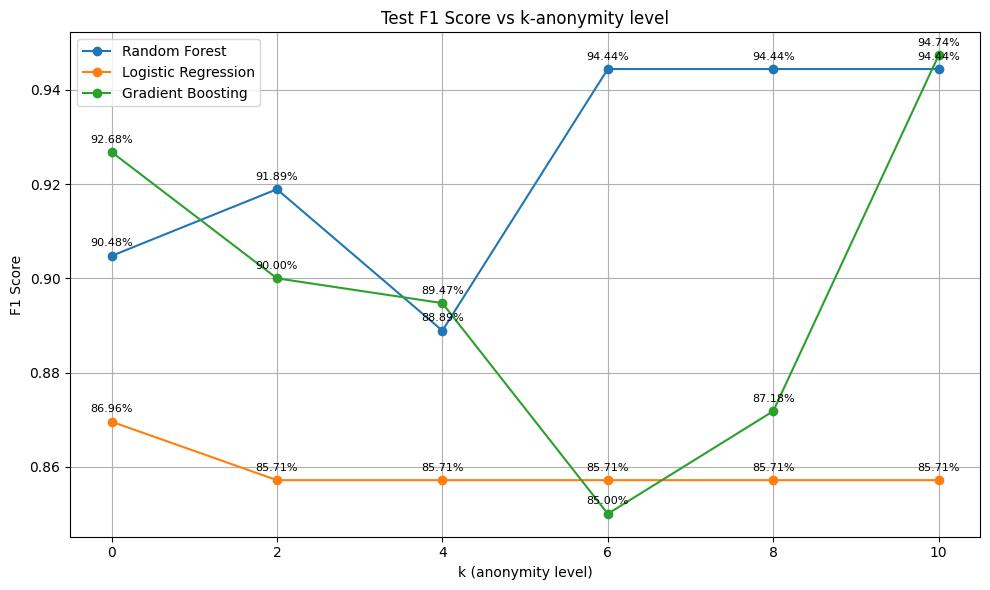

In [177]:
# Mapping for k values to their respective score dicts
f1_summary = {
    0: score_k0,
    2: score_k2,
    4: score_k4,
    6: score_k6,
    8: score_k8,
    10: score_k10
}

# Extract model names from the first entry dynamically
model_names = list(next(iter(f1_summary.values())).keys())
k_values = sorted(f1_summary.keys())

# Plot each model's F1 score across k
plt.figure(figsize=(10, 6))
for model in model_names:
    f1_scores = [f1_summary[k][model]['test']['f1'] for k in k_values]
    plt.plot(k_values, f1_scores, marker='o', label=model)
    for k, score in zip(k_values, f1_scores):
        plt.text(k, score + 0.002, f"{score:.2%}", ha='center', fontsize=8)

plt.title('Test F1 Score vs k-anonymity level')
plt.xlabel('k (anonymity level)')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# K-anonymity v2


In [243]:
QIDs = ['T', 'N', 'M', 'Stage', 'Response']
for col in QIDs:
    unique_vals = df[col].unique()
    print(f" - {col}: {unique_vals}")


 - T: ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
 - N: ['N0' 'N1b' 'N1a']
 - M: ['M0' 'M1']
 - Stage: ['I' 'II' 'IVB' 'III' 'IVA']
 - Response: ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']


In [ ]:
def apply_k_anonymity(df_in, k):
    import pandas as pd

    df = df_in.copy()

    # Only anonymize highly predictive fields
    QIDs = ['T', 'N', 'M', 'Stage', 'Response']

    def generalize(row):
        for col in QIDs:
            val = row.get(col)

            if pd.isna(val):
                continue

            # T grouping
            if col == 'T':
                if k >= 10:
                    row[col] = '*'
                elif k >= 8:
                    row[col] = 'T≤2' if any(t in val for t in ['T1', 'T2']) else 'T>2'
                elif k >= 6:
                    row[col] = 'T1/T2' if any(t in val for t in ['T1', 'T2']) else 'T3/T4'
                elif k >= 4:
                    row[col] = val[:2] if val.startswith('T1') or val.startswith('T2') else 'T3/T4'
                elif k >= 2:
                    row[col] = val[:2]  # T1, T2, T3, T4

            # N grouping
            elif col == 'N':
                if k >= 10:
                    row[col] = '*'
                elif k >= 8:
                    row[col] = 'N*'  # fully generalized except at k=10
                elif k >= 6:
                    row[col] = 'N0' if val == 'N0' else 'N1'
                elif k >= 4:
                    row[col] = 'N0' if val == 'N0' else 'N1'
                elif k >= 2:
                    row[col] = val  # original

            # M grouping
            elif col == 'M':
                if k >= 10:
                    row[col] = '*'
                elif k >= 8:
                    row[col] = 'M*'  # fully generalized
                elif k >= 6:
                    row[col] = val  # no further grouping yet (already M0/M1)
                elif k >= 4:
                    row[col] = val
                elif k >= 2:
                    row[col] = val

            # Stage grouping
            elif col == 'Stage':
                if k >= 10:
                    row[col] = '*'
                elif k >= 8:
                    row[col] = 'I/II' if val[0] in ['I', 'II'] else 'III/IV'
                elif k >= 6:
                    row[col] = 'I/II' if val[0] in ['I', 'II'] else 'III/IV'
                elif k >= 4:
                    row[col] = val[0] if val[0] in ['I', 'II', 'III'] else 'IV'
                elif k >= 2:
                    row[col] = val[0] if val[0] in ['I', 'II', 'III'] else 'IV'

            # Response grouping → updated as per our discussion
            elif col == 'Response':
                if k >= 10:
                    row[col] = '*'
                elif k >= 8:
                    row[col] = '*'
                elif k >= 6:
                    row[col] = 'Good' if val == 'Excellent' else 'Bad'
                elif k >= 4:
                    row[col] = 'Indeterminate' if val == 'Indeterminate' else 'Other'
                elif k >= 2:
                    row[col] = 'Good' if val == 'Excellent' else ('Indeterminate' if val == 'Indeterminate' else 'Bad')

        return row



    df = df.apply(generalize, axis=1)

    # Group by QIDs and suppress groups with < k members
    group_sizes = df.groupby(QIDs).size().reset_index(name='counts')
    small_group_set = set(tuple(x) for x in group_sizes[group_sizes['counts'] < k][QIDs].values)

    def suppress(row):
        if tuple(row[q] for q in QIDs) in small_group_set:
            for q in QIDs:
                row[q] = '*'
        return row

    df = df.apply(suppress, axis=1)

    print(f"✅ k={k} Progressive Anonymization:")
    print(f" - Unique Groups: {df[QIDs].drop_duplicates().shape[0]}")
    print(f" - Suppressed Rows: {(df[QIDs] == '*').all(axis=1).sum()} / {len(df)}")

    return df


In [245]:
X, y = preprocess_for_ml(df)  # This step should be from your previous code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Evaluate models
score_k0 = evaluate_models(X_train, X_test, y_train, y_test)



Model (Random Forest) Evaluation:
🔹 Training Set:
   - F1 Score : 1.00
🔹 Test Set:
   - F1 Score : 0.90

Model (Logistic Regression) Evaluation:
🔹 Training Set:
   - F1 Score : 0.86
🔹 Test Set:
   - F1 Score : 0.87

Model (Gradient Boosting) Evaluation:
🔹 Training Set:
   - F1 Score : 1.00
🔹 Test Set:
   - F1 Score : 0.93


## K=2

In [246]:
extra_qids = ['Response', 'Stage', 'T']

In [247]:
df_pre = df.copy()

In [248]:
k = 2
df_anonymous = apply_k_anonymity(df_pre, k)
df_anonymous.head()

✅ k=2 Progressive Anonymization:
 - Unique Groups: 27
 - Suppressed Rows: 6 / 383


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1,N0,M0,I,Good,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1,N0,M0,I,Good,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1,N0,M0,I,Good,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1,N0,M0,I,Good,No


In [249]:


X_processed, y_processed = preprocess_for_ml(df_anonymous)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

score_k2 = evaluate_models(X_train, X_test, y_train, y_test)



Model (Random Forest) Evaluation:
🔹 Training Set:
   - F1 Score : 0.99
🔹 Test Set:
   - F1 Score : 0.88

Model (Logistic Regression) Evaluation:
🔹 Training Set:
   - F1 Score : 0.88
🔹 Test Set:
   - F1 Score : 0.88

Model (Gradient Boosting) Evaluation:
🔹 Training Set:
   - F1 Score : 0.99
🔹 Test Set:
   - F1 Score : 0.88


## K=4

In [250]:
k = 4
df_anonymous = apply_k_anonymity(df_pre, k, )
df_anonymous.head()


✅ k=4 Progressive Anonymization:
 - Unique Groups: 13
 - Suppressed Rows: 5 / 383


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1,N0,M0,I,Other,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1,N0,M0,I,Other,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1,N0,M0,I,Other,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1,N0,M0,I,Other,No


In [251]:

X_processed, y_processed = preprocess_for_ml(df_anonymous)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

score_k4 = evaluate_models(X_train, X_test, y_train, y_test)



Model (Random Forest) Evaluation:
🔹 Training Set:
   - F1 Score : 0.99
🔹 Test Set:
   - F1 Score : 0.82

Model (Logistic Regression) Evaluation:
🔹 Training Set:
   - F1 Score : 0.83
🔹 Test Set:
   - F1 Score : 0.82

Model (Gradient Boosting) Evaluation:
🔹 Training Set:
   - F1 Score : 0.97
🔹 Test Set:
   - F1 Score : 0.83


## K=6

In [252]:
k = 6
df_anonymous = apply_k_anonymity(df_pre, k)
df_anonymous.head()

✅ k=6 Progressive Anonymization:
 - Unique Groups: 10
 - Suppressed Rows: 4 / 383


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1/T2,N0,M0,I/II,Bad,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1/T2,N0,M0,I/II,Good,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1/T2,N0,M0,I/II,Good,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1/T2,N0,M0,I/II,Good,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1/T2,N0,M0,I/II,Good,No


In [253]:

X_processed, y_processed = preprocess_for_ml(df_anonymous)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

score_k6 = evaluate_models(X_train, X_test, y_train, y_test)



Model (Random Forest) Evaluation:
🔹 Training Set:
   - F1 Score : 0.99
🔹 Test Set:
   - F1 Score : 0.76

Model (Logistic Regression) Evaluation:
🔹 Training Set:
   - F1 Score : 0.87
🔹 Test Set:
   - F1 Score : 0.83

Model (Gradient Boosting) Evaluation:
🔹 Training Set:
   - F1 Score : 0.97
🔹 Test Set:
   - F1 Score : 0.83


## K=8

In [254]:
k = 8
df_anonymous = apply_k_anonymity(df_pre, k)
df_anonymous.head()

✅ k=8 Progressive Anonymization:
 - Unique Groups: 2
 - Suppressed Rows: 0 / 383


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T≤2,N*,M*,I/II,*,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T≤2,N*,M*,I/II,*,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T≤2,N*,M*,I/II,*,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T≤2,N*,M*,I/II,*,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T≤2,N*,M*,I/II,*,No


In [255]:
X_processed, y_processed = preprocess_for_ml(df_anonymous)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

score_k8 = evaluate_models(X_train, X_test, y_train, y_test)



Model (Random Forest) Evaluation:
🔹 Training Set:
   - F1 Score : 0.99
🔹 Test Set:
   - F1 Score : 0.74

Model (Logistic Regression) Evaluation:
🔹 Training Set:
   - F1 Score : 0.80
🔹 Test Set:
   - F1 Score : 0.71


/tmp/ipykernel_862/945757713.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace('*', np.nan)



Model (Gradient Boosting) Evaluation:
🔹 Training Set:
   - F1 Score : 0.97
🔹 Test Set:
   - F1 Score : 0.82


## K=10

In [256]:
k = 10
df_anonymous = apply_k_anonymity(df_pre, k)
df_anonymous.head()

✅ k=10 Progressive Anonymization:
 - Unique Groups: 1
 - Suppressed Rows: 383 / 383


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,*,*,*,*,*,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,*,*,*,*,*,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,*,*,*,*,*,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,*,*,*,*,*,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,*,*,*,*,*,No


In [257]:

X_processed, y_processed = preprocess_for_ml(df_anonymous)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

score_k10 = evaluate_models(X_train, X_test, y_train, y_test)



Model (Random Forest) Evaluation:
🔹 Training Set:
   - F1 Score : 0.99
🔹 Test Set:
   - F1 Score : 0.76

Model (Logistic Regression) Evaluation:
🔹 Training Set:
   - F1 Score : 0.78
🔹 Test Set:
   - F1 Score : 0.69


/tmp/ipykernel_862/945757713.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace('*', np.nan)



Model (Gradient Boosting) Evaluation:
🔹 Training Set:
   - F1 Score : 0.95
🔹 Test Set:
   - F1 Score : 0.79


## Evaluation

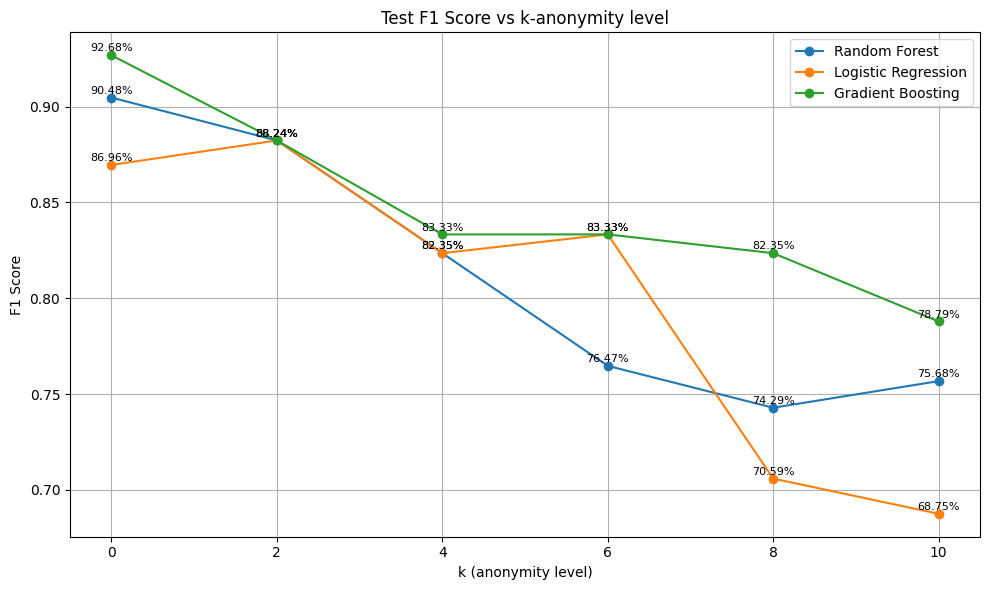

In [258]:
# Mapping for k values to their respective score dicts
f1_summary = {
    0: score_k0,
    2: score_k2,
    4: score_k4,
    6: score_k6,
    8: score_k8,
    10: score_k10
}

# Extract model names from the first entry dynamically
model_names = list(next(iter(f1_summary.values())).keys())
k_values = sorted(f1_summary.keys())

# Plot each model's F1 score across k
plt.figure(figsize=(10, 6))
for model in model_names:
    f1_scores = [f1_summary[k][model]['test']['f1'] for k in k_values]
    plt.plot(k_values, f1_scores, marker='o', label=model)
    for k, score in zip(k_values, f1_scores):
        plt.text(k, score + 0.002, f"{score:.2%}", ha='center', fontsize=8)

plt.title('Test F1 Score vs k-anonymity level')
plt.xlabel('k (anonymity level)')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [259]:
f1_summary

{0: {'Random Forest': {'model': 'Random Forest',
   'train': {'f1': 1.0},
   'test': {'f1': 0.9047619047619048}},
  'Logistic Regression': {'model': 'Logistic Regression',
   'train': {'f1': 0.8571428571428571},
   'test': {'f1': 0.8695652173913043}},
  'Gradient Boosting': {'model': 'Gradient Boosting',
   'train': {'f1': 1.0},
   'test': {'f1': 0.926829268292683}}},
 2: {'Random Forest': {'model': 'Random Forest',
   'train': {'f1': 0.9943502824858758},
   'test': {'f1': 0.8823529411764706}},
  'Logistic Regression': {'model': 'Logistic Regression',
   'train': {'f1': 0.8823529411764706},
   'test': {'f1': 0.8823529411764706}},
  'Gradient Boosting': {'model': 'Gradient Boosting',
   'train': {'f1': 0.9943502824858758},
   'test': {'f1': 0.8823529411764706}}},
 4: {'Random Forest': {'model': 'Random Forest',
   'train': {'f1': 0.9943502824858758},
   'test': {'f1': 0.8235294117647058}},
  'Logistic Regression': {'model': 'Logistic Regression',
   'train': {'f1': 0.8255813953488372},


| Feature         | k=0 (original)                                                       | k=2                   | k=4                   | k=6          | k=8         | k=10 |
| --------------- | -------------------------------------------------------------------- | --------------------- | --------------------- | ------------ | ----------- | ---- |
| T               | T1a,T1b,T2,T3a,T3b,T4a,T4b                                           | T1,T2,T3,T4           | T1,T2,T3/T4           | T1/T2, T3/T4 | T≤2, T>2    | \*   |
| N               | N0,N1a,N1b                                                           | N0,N1a,N1b            | N0,N1                 | N0/N1        | N\*         | \*   |
| M               | M0,M1                                                                | M0,M1                 | M0,M1                 | M0,M1        | M\*         | \*   |
| Stage           | I,II,III,IVA,IVB                                                     | I,II,III,IV           | I,II,III/IV           | I/II,III/IV  | I/II,III/IV | \*   |
| Response        | Excellent,Indeterminate,Structural Incomplete,Biochemical Incomplete | Good/Indeterminate/Bad | Indeterminate/Other    | Good/Bad     | \*          | \*   |

